# Hackathon 4 - Stephen Mo

## Brief
You are the data analyst for a financial institution that provides credit cards and loans to private individuals. Your role is pivotal in both performance reporting and analysis, as well as lending insight and direction to possible business decisions. Your manager has an important meeting with senior executives in one week's time to discuss business performance.

As the data analyst, your manager has requested that you produce a short report showing the following:

1. Part A - how loans are performing by district
2. Part B - a breakdown of default rates by client demographic (age, gender)
3. Part C - you are also expected to advise on any issues you feel may face the organisation based on your report


## Import Libraries

In [1]:
# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Part A - how loans are performing by district
### Source Data (A)

The financial data was presented in 8 data tables in the database schema. I queried the data using SQL using SELECT, LEFT JOIN, GROUP BY and CUBE function to produce the .CSV file

In [2]:
# import the .csv file
df = pd.read_csv('loan_amounts.csv')

In [3]:
# see first 5 rows
df.head()

,a2,status,loantotal
0,Benesov,A,107640
1,Benesov,C,780312
2,Benesov,NaN,887952
3,Beroun,A,19248
4,Beroun,C,913872


### Cleanse Data (A)

Rename a2 heading to 'district name'

In [4]:
df.rename(columns={'a2': 'district name'}, inplace=True)

In [5]:
# a2 heading name changed
df.head()

,district name,status,loantotal
0,Benesov,A,107640
1,Benesov,C,780312
2,Benesov,NaN,887952
3,Beroun,A,19248
4,Beroun,C,913872


The NaN were generated when the CUBE function was used in SQL. These should be renamed to 'Total'

In [6]:
df = df.fillna('Total') 

In [7]:
# NaNs are gone
df.head()

,district name,status,loantotal
0,Benesov,A,107640
1,Benesov,C,780312
2,Benesov,Total,887952
3,Beroun,A,19248
4,Beroun,C,913872


In [8]:
# check structure and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
district name    280 non-null object
status           280 non-null object
loantotal        280 non-null int64
dtypes: int64(1), object(2)
memory usage: 6.6+ KB


### Explore Data (A)

The goal is to calculate each loan status as a ratio of the total for each district. 
* Loan status A - contract finished, no problems. These are past performing loans
* Loan status B - contract finished, loan not paid. These are past non-performing loans
* Loan status C - contract running, no problems. These are current performing loans
* Loan status D - contract running, client in debt. These are current non-performing loans

In [9]:
# create dataframes for each loan status
totals = df[df['status']=='Total']
a_loans = df[df['status']=='A']
b_loans = df[df['status']=='B']
c_loans = df[df['status']=='C']
d_loans = df[df['status']=='D']

In [10]:
# join two dataframes - total to A loans
joined_totals_a_loans = totals.merge(a_loans, on="district name")

In [11]:
# appears to have worked
joined_totals_a_loans.head()

,district name,status_x,loantotal_x,status_y,loantotal_y
0,Benesov,Total,887952,A,107640
1,Beroun,Total,1460796,A,19248
2,Blansko,Total,1191024,A,147660
3,Breclav,Total,1176792,A,123696
4,Brno - mesto,Total,4049400,A,213432


In [12]:
# repeat for B, C & D loans
joined_totals_b_loans = totals.merge(b_loans, on="district name")
joined_totals_c_loans = totals.merge(c_loans, on="district name")
joined_totals_d_loans = totals.merge(d_loans, on="district name")

In [13]:
# work out ratio of A loans to total. A loans are past performing i.e. good ones
joined_totals_a_loans['past performing loan ratio'] = joined_totals_a_loans['loantotal_y'] / joined_totals_a_loans['loantotal_x']

In [14]:
# sort on past performing loan ratios. best districts at the top
joined_totals_a_loans = joined_totals_a_loans.sort_values('past performing loan ratio', ascending=False)

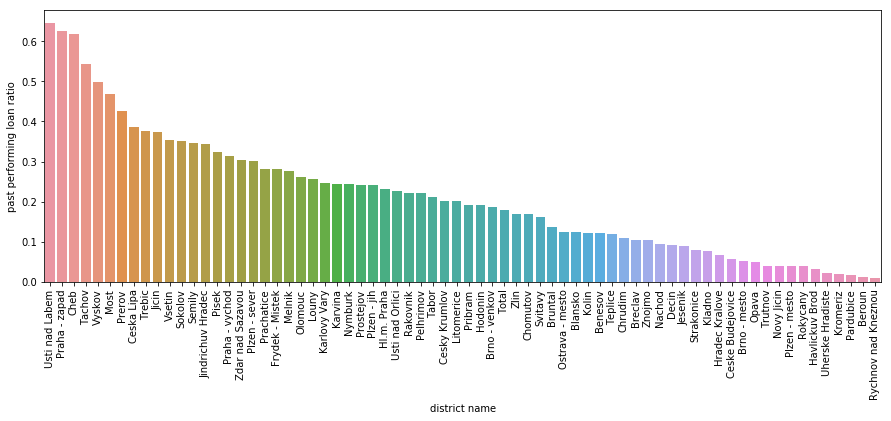

In [15]:
# plot past performing loans for each district
fig= plt.figure(figsize=(15,5))
sns.barplot(x='district name', y='past performing loan ratio', data=joined_totals_a_loans)
plt.xticks(rotation='vertical')
plt.show()

In [16]:
# work out ratio of B loans to total. B loans are past non-performing i.e. bad ones
joined_totals_b_loans['past non-performing loan ratio'] = joined_totals_b_loans['loantotal_y'] / joined_totals_b_loans['loantotal_x']

In [17]:
# sort on past non-performing loan ratios. worst districts at the top
joined_totals_b_loans = joined_totals_b_loans.sort_values('past non-performing loan ratio', ascending=False)

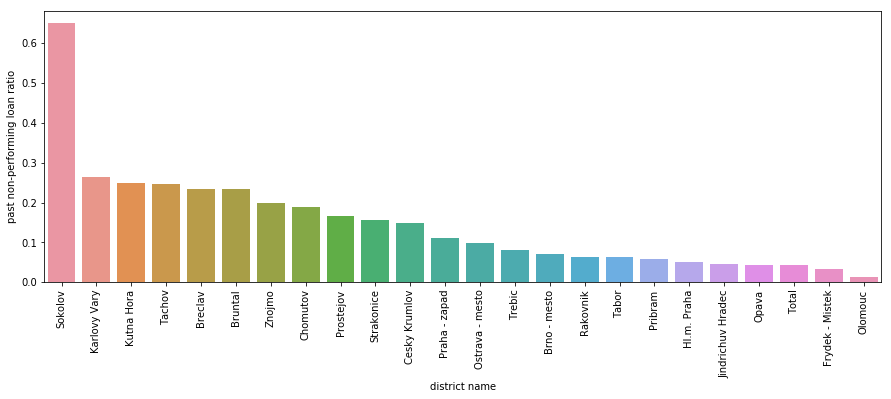

In [18]:
# plot past performing loans for each district
fig= plt.figure(figsize=(15,5))
sns.barplot(x='district name', y='past non-performing loan ratio', data=joined_totals_b_loans)
plt.xticks(rotation='vertical')
plt.show()

We skipped the analysis for loan status C & D in the interest of time

## Part B - a breakdown of default rates by client demographic (age, gender)
### Source Data For Part B

Query the database in SQL using multiple LEFT JOIN, CASE and GROUP BY to produce the .csv file

In [19]:
# import the .csv file for gender
df2 = pd.read_csv('default_rate.csv')

In [20]:
# see dataframe by gender
df2

,gender,default_rate
0,M,0.122807
1,F,0.141667


In [21]:
# import the .csv file for gender
df3 = pd.read_csv('default_rate_age.csv')

In [22]:
# see dataframe by age
df3.head()

,age,default_rate
0,61,0.285714
1,71,0.200000
2,56,0.142857
3,73,0.200000
4,49,0.125000


### Cleanse Data (B)
No cleansing required

### Explore Data (B)
Females have slightly higher default rates. It must be their higher propensity to go clothes shopping!

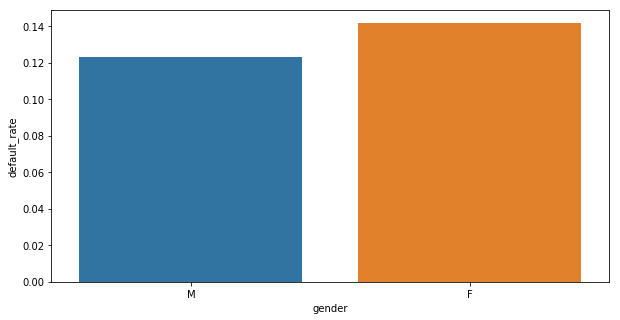

In [23]:
# plot default rates by gender
fig= plt.figure(figsize=(10,5))
sns.barplot(x='gender', y='default_rate', data=df2)
# plt.xticks(rotation='vertical')
plt.show()

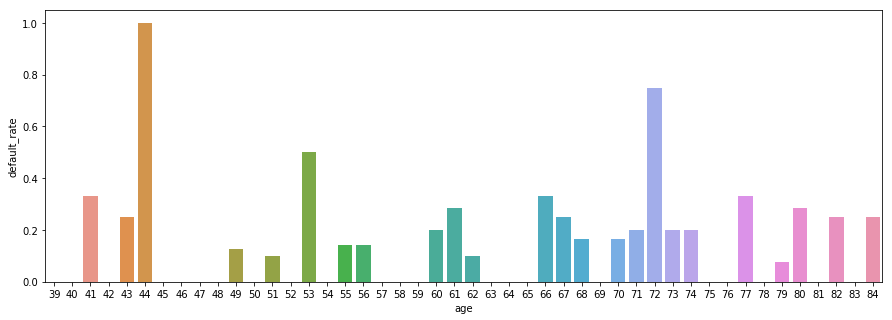

In [24]:
# plot default rates by age
fig= plt.figure(figsize=(15,5))
sns.barplot(x='age', y='default_rate', data=df3)
# plt.xticks(rotation='vertical')
plt.show()

## Conclusion
In Czech Republic, the districts of Usti Nad Labem, Praha and Cheb have the best past performing loans, whereas Sokolov has the highest ratio of past non-performing loans.

In terms of client gender, females have a slightly higher default rate than males.

In terms of client age, age 44 and 72 have the highest default rates. I would like to group ages and combine it with gender data for future work

I did not have time to work on part C